In [3]:
!pip install umap-learn seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.0 MB/s eta 0:00:00


Saving winequality-white.csv to winequality-white.csv
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


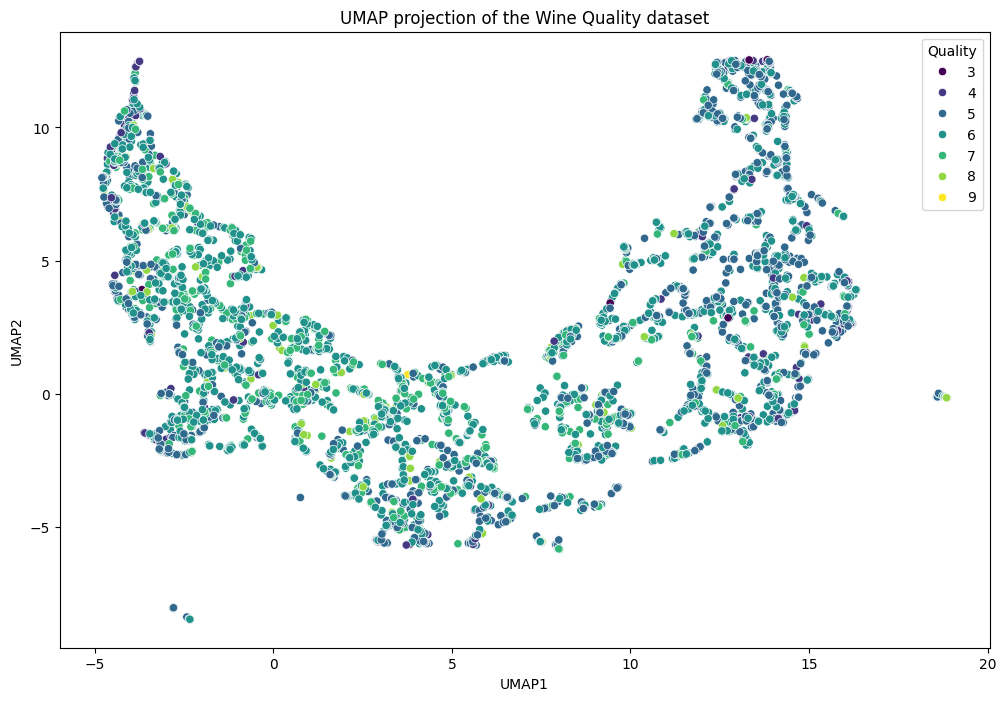

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
dtype: float64


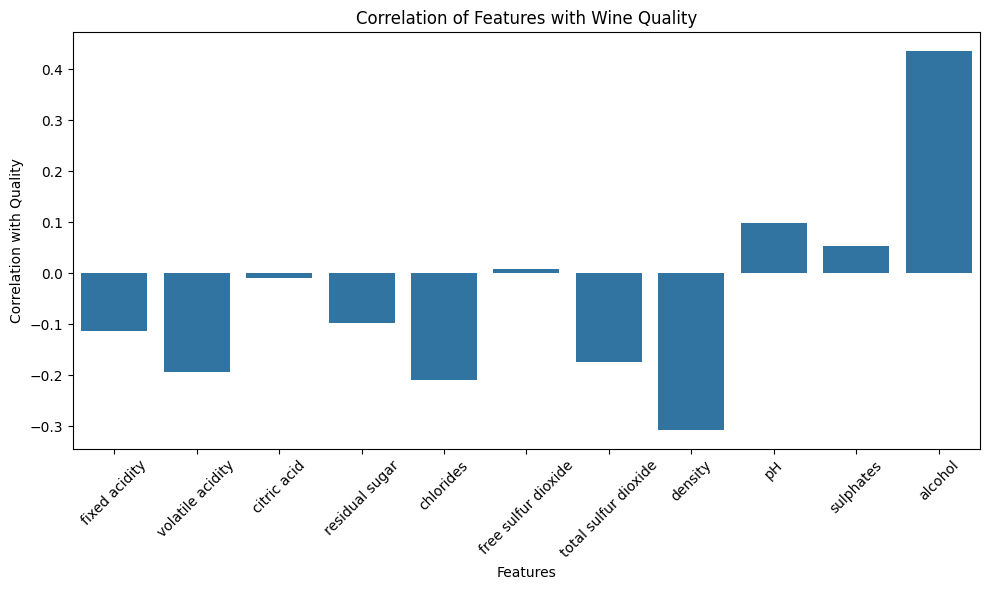

In [4]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# データの読み込み
# ファイルをアップロード
uploaded = files.upload()

# アップロードされたファイル名を取得
file_name = next(iter(uploaded))

# CSVファイルをデータフレームとして読み込む
data = pd.read_csv(file_name, delimiter=';')  # デリミタがセミコロンで区切られている場合

# 列名の表示
print(data.columns)

# 特徴量とターゲットの分離（適切な列名を使用）
X = data.drop("quality", axis=1)  # 正しいターゲット列名を使用
y = data['quality']  # 正しいターゲット列名を使用

# UMAPの適用
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# 結果のデータフレーム化
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['Quality'] = y

# 可視化
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Quality', palette='viridis', data=embedding_df, legend='full')
plt.title('UMAP projection of the Wine Quality dataset')
plt.show()

# 相関係数の計算
correlations = X.corrwith(y)

# 相関係数の表示
print(correlations)

# バーグラフの作成
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation of Features with Wine Quality')
plt.xlabel('Features')
plt.ylabel('Correlation with Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()